In [4]:
import functions as f
from classes import MKID
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve, find_peaks
from scipy.optimize import curve_fit

%matplotlib widget

def get_files(dir, kid, pread, nr_files):
        return files

def make_template(window=exp, thres=, nr_files=1)
        get light data 1s
        smooth
        detect (5 sigma light < x < 10 sigma)
        cut smooth and raw
        ensure single pulses smooth (1 peak at 3 sigma )
        average

        smooth
        detect
        ensure single pulses
        average

def get_data(chuncksize):
        concatenate data

def get_info(dir, kid, pread):
        return info

def get_window():
        return window

def get_std(data, window):
        std
        remove outliers
        std
        remove outliers
        std
        return std

def get_noise_model():
        remove outliers
        while nr_req_segments <
                whelch
        return noise psd

def get_pulse_model():
        remove too close
        cut pulses
        return pulses, too_close

def make_filter(pulse_model, noise_model):
        return OF

def iterate_filter(signal, noise, filter):
        smooth noise
        get_std
        get_noise_model()

        smooth signal
        find peaks
        get_pulse_model()

        make_filter()
        return optimal filter


def get_pulses(signal, noise)
        filter0 = get_window(box/2)
        _, _, filter1 = iterate_filter(filter0)
        _, _, filter2 = iterate_filter(filter1)

        smooth signal 
        find peaks 
        get_pulse_model()
        return pulses, too_close pulses, optimal filter

def get_tau():

def get_opt_heights():

def get_resolving power():

def get_count_rate():

get_info()
get files()
    get_data(signal)
    get_data(noise)
    get_pulses(signal, noise)
stack 

get_tau(pulse model)

get_optimal_heights(pulses, optimal filter):

get_resolving power():

get_count_rate():

class kid:
    def __init__(dir1, dir2, type, nr_files, kid_nr, pread, tqp, pw):

994 0
803 0


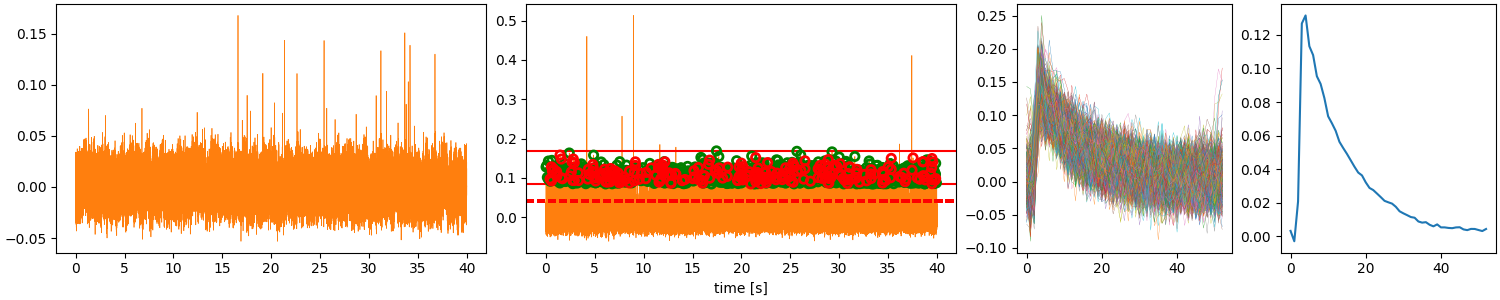

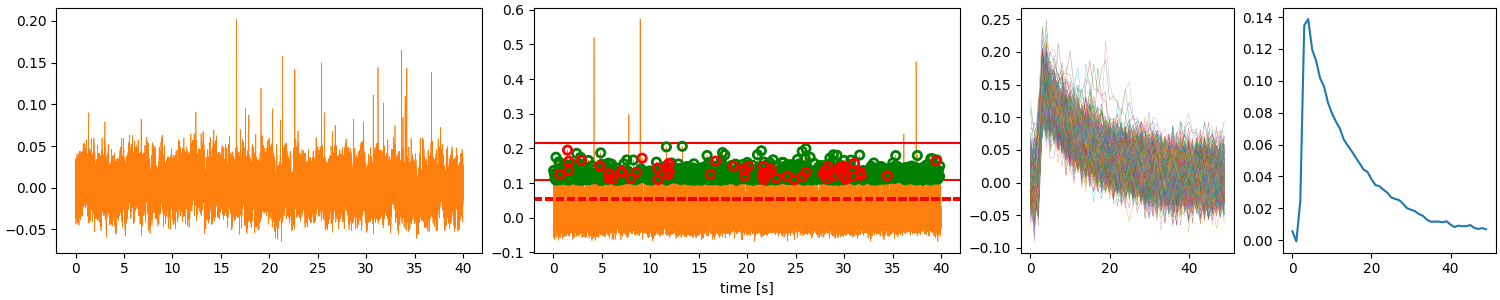

In [11]:
plt.close()
light_dir = "./README Example Data/LT218Chip1_BF_20240116_MIR18_5/12KIDS_185um_BB200K/TD_Power"
dark_dir = "./README Example Data/LT218Chip1_BF_20240116_MIR18_5/12KIDS_185um_BBoff/TD_Power"
kid_nr = 5     
pread = 113 
# light_dir = "./README Example Data/LT192Chip1_BF_20220235/1KIDs laser on 1545 50nW 46dB/TD_Power"  # directory for the pulsedata
# dark_dir = './README Example Data/LT192Chip1_BF_20220235/1KIDs laser off/TD_Power'  # directory for the noise data
# kid_nr = 1    
# pread = 102 
tqp = 300
smooth_type = 'box'
pw = 1000
nr_files = 5
file_type = 'med'


if dark_dir:
    dark_files, _ = f.get_bin_files(dark_dir, kid_nr, pread, type=file_type)
    dark_amp, dark_theta, _ = f.concat_vis(dark_files[:nr_files])
    _, dark_X = f.smith_coord(dark_theta, dark_amp)
if light_dir:
    light_files, info_path = f.get_bin_files(light_dir, kid_nr, pread, type=file_type)
    light_amp, light_theta, _ = f.concat_vis(light_files[:nr_files])
    _, light_X = f.smith_coord(light_theta, dark_amp)
if info_path:
    info = f.get_info(info_path[0])
    sf = info['fs']
    dt = int(1 / sf * 1e6)
    sw = int(tqp / dt)

fig, ax = plt.subplot_mosaic('aabbcd', constrained_layout=True, figsize=(15, 3))

if tqp and sw > 3:
    filter = f.get_window(smooth_type, sw)
    light_X_smooth = convolve(light_X, filter, mode='valid')
    sigma_light = np.std(light_X_smooth)
    dark_X_smooth = convolve(dark_X, filter, mode='valid')
    ax['a'].plot(np.arange(len(dark_X_smooth))*dt*1e-6, dark_X_smooth, lw=.5, c='tab:orange', zorder=1)
    ax['b'].plot(np.arange(len(dark_X_smooth))*dt*1e-6, light_X_smooth, lw=.5, c='tab:orange', zorder=1)
    minph = 5*sigma_light
    maxph = 10*sigma_light
    ax['b'].axhline(minph, c='r', zorder=2)
    ax['b'].axhline(maxph, c='r', zorder=2)
    locs, props = find_peaks(light_X_smooth, height=[minph, maxph], prominence=minph/2) 
    nr_peaks = len(locs)
    nr_points = len(light_X)
    heights = props['peak_heights']
# ax['a'].plot(np.arange(len(dark_X))*dt*1e-6, dark_X, lw=.5, c='tab:blue', zorder=0)
# ax['b'].plot(np.arange(len(dark_X))*dt*1e-6, light_X, lw=.5, c='tab:blue', zorder=0)
ax['b'].set_xlabel('time [s]')
pw = int(pw / dt)
pulses = []
offset = int(np.ceil(50 / dt))
too_close = 0
single_pulses = np.zeros(nr_peaks, dtype=bool)
for i, loc in enumerate(locs):
    too_close = 0
    smooth_pulse = light_X_smooth[loc-pw:loc+pw]	
    pulse = light_X[loc-pw:loc+pw]	
    sublocs, subprops = find_peaks(smooth_pulse, height=[minph/2, maxph], prominence=minph/4)
    ax['b'].axhline(minph/2, c='r', zorder=2, ls='--')
    # ax['b'].axhline(maxph, c='r', zorder=2)
    if len(sublocs) > 1:
        too_close += 1
        # print('too_close')
    elif len(sublocs) == 1:                    
        single_pulses[i] = 1
        single_pulse = pulse[-(offset+pw):]
        pulses.append(single_pulse)
    else:
        print('no peaks')
pulses = np.array(pulses)
pulses = pulses.reshape((-1, pw+offset))
nr_sel_pulses = pulses.shape[0]
ax['c'].plot(pulses.T, lw=.2)
nr_too_close = np.sum(~single_pulses)
ax['b'].scatter(locs[single_pulses]*dt*1e-6, light_X_smooth[locs[single_pulses]], lw=2, facecolor='None', edgecolor='g', zorder=3)
ax['b'].scatter(locs[~single_pulses]*dt*1e-6, light_X_smooth[locs[~single_pulses]], lw=2, facecolor='None', edgecolor='r', zorder=3)

mean_pulse = np.mean(pulses, axis=0)
ax['d'].plot(mean_pulse)

print(nr_sel_pulses, too_close)
fig, ax = plt.subplot_mosaic('aabbcd', constrained_layout=True, figsize=(15, 3))

if tqp and sw > 3:
    filter = mean_pulse[::-1]
    light_X_smooth = convolve(light_X, filter, mode='valid')
    sigma_light = np.std(light_X_smooth)
    dark_X_smooth = convolve(dark_X, filter, mode='valid')
    ax['a'].plot(np.arange(len(dark_X_smooth))*dt*1e-6, dark_X_smooth, lw=.5, c='tab:orange', zorder=1)
    ax['b'].plot(np.arange(len(dark_X_smooth))*dt*1e-6, light_X_smooth, lw=.5, c='tab:orange', zorder=1)
    minph = 5*sigma_light
    maxph = 10*sigma_light
    ax['b'].axhline(minph, c='r', zorder=2)
    ax['b'].axhline(maxph, c='r', zorder=2)
    locs, props = find_peaks(light_X_smooth, height=[minph, maxph], prominence=minph/2) 
    nr_peaks = len(locs)
    nr_points = len(light_X)
    heights = props['peak_heights']
# ax['a'].plot(np.arange(len(dark_X))*dt*1e-6, dark_X, lw=.5, c='tab:blue', zorder=0)
# ax['b'].plot(np.arange(len(dark_X))*dt*1e-6, light_X, lw=.5, c='tab:blue', zorder=0)
ax['b'].set_xlabel('time [s]')
# pw = int(pw / dt)
pulses = []
offset = 0
too_close = 0
single_pulses = np.zeros(nr_peaks, dtype=bool)
for i, loc in enumerate(locs):
    too_close = 0
    smooth_pulse = light_X_smooth[loc-pw:loc+pw]	
    pulse = light_X[loc-pw:loc+pw]	
    sublocs, subprops = find_peaks(smooth_pulse, height=[minph/2, maxph], prominence=minph/4)
    ax['b'].axhline(minph/2, c='r', zorder=2, ls='--')
    # ax['b'].axhline(maxph, c='r', zorder=2)
    if len(sublocs) > 1:
        too_close += 1
        # print('too_close')
    elif len(sublocs) == 1:                    
        single_pulses[i] = 1
        single_pulse = pulse[-(offset+pw):]
        pulses.append(single_pulse)
    else:
        print('no peaks')
pulses = np.array(pulses)
pulses = pulses.reshape((-1, pw+offset))
nr_sel_pulses = pulses.shape[0]
ax['c'].plot(pulses.T, lw=.2)
nr_too_close = np.sum(~single_pulses)
ax['b'].scatter(locs[single_pulses]*dt*1e-6, light_X_smooth[locs[single_pulses]], lw=2, facecolor='None', edgecolor='g', zorder=3)
ax['b'].scatter(locs[~single_pulses]*dt*1e-6, light_X_smooth[locs[~single_pulses]], lw=2, facecolor='None', edgecolor='r', zorder=3)

mean_pulse = np.mean(pulses, axis=0)
ax['d'].plot(mean_pulse)
print(nr_sel_pulses, too_close)

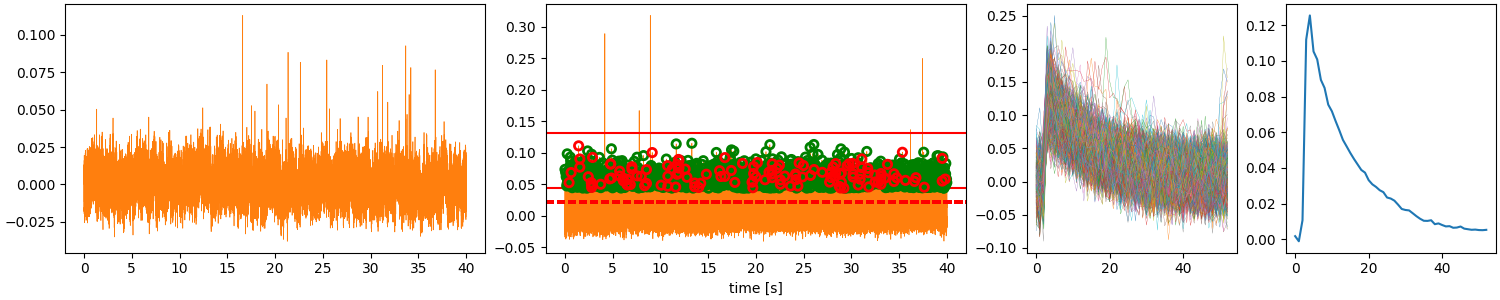

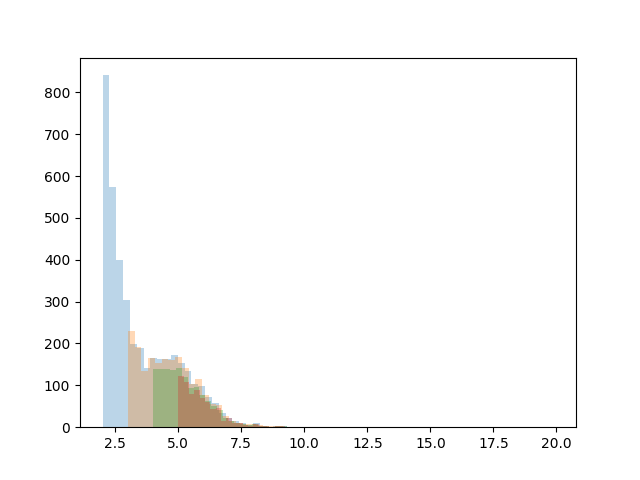

In [32]:
plt.close()
light_dir = "./README Example Data/LT218Chip1_BF_20240116_MIR18_5/12KIDS_185um_BB200K/TD_Power"
dark_dir = "./README Example Data/LT218Chip1_BF_20240116_MIR18_5/12KIDS_185um_BBoff/TD_Power"
kid_nr = 5     
pread = 113 
# light_dir = "./README Example Data/LT192Chip1_BF_20220235/1KIDs laser on 1545 50nW 46dB/TD_Power"  # directory for the pulsedata
# dark_dir = './README Example Data/LT192Chip1_BF_20220235/1KIDs laser off/TD_Power'  # directory for the noise data
# kid_nr = 1    
# pread = 102 
tqp = 300
smooth_type = 'exp'
pw = 1000
nr_files = 5
file_type = 'med'


if dark_dir:
    dark_files, _ = f.get_bin_files(dark_dir, kid_nr, pread, type=file_type)
    dark_amp, dark_theta, _ = f.concat_vis(dark_files[:nr_files])
    _, dark_X = f.smith_coord(dark_theta, dark_amp)
if light_dir:
    light_files, info_path = f.get_bin_files(light_dir, kid_nr, pread, type=file_type)
    light_amp, light_theta, _ = f.concat_vis(light_files[:nr_files])
    _, light_X = f.smith_coord(light_theta, dark_amp)
if info_path:
    info = f.get_info(info_path[0])
    sf = info['fs']
    dt = int(1 / sf * 1e6)
    sw = int(tqp / dt)

fig, ax = plt.subplot_mosaic('aabbcd', constrained_layout=True, figsize=(15, 3))

if tqp and sw > 3:
    filter = f.get_window(smooth_type, sw)
    light_X_smooth = convolve(light_X, filter, mode='valid')
    sigma_light = np.std(light_X_smooth)
    dark_X_smooth = convolve(dark_X, filter, mode='valid')
    ax['a'].plot(np.arange(len(dark_X_smooth))*dt*1e-6, dark_X_smooth, lw=.5, c='tab:orange', zorder=1)
    ax['b'].plot(np.arange(len(dark_X_smooth))*dt*1e-6, light_X_smooth, lw=.5, c='tab:orange', zorder=1)
    minph = 3.5*sigma_light
    maxph = 10.5*sigma_light
    ax['b'].axhline(minph, c='r', zorder=2)
    ax['b'].axhline(maxph, c='r', zorder=2)
    locs, props = find_peaks(light_X_smooth, height=[minph, maxph], prominence=minph/2) 
    nr_peaks = len(locs)
    nr_points = len(light_X)
    heights = props['peak_heights']
# ax['a'].plot(np.arange(len(dark_X))*dt*1e-6, dark_X, lw=.5, c='tab:blue', zorder=0)
# ax['b'].plot(np.arange(len(dark_X))*dt*1e-6, light_X, lw=.5, c='tab:blue', zorder=0)
ax['b'].set_xlabel('time [s]')
pw = int(pw / dt)
pulses = []
offset = int(np.ceil(50 / dt))
too_close = 0
single_pulses = np.zeros(nr_peaks, dtype=bool)
for i, loc in enumerate(locs):
    too_close = 0
    smooth_pulse = light_X_smooth[loc-pw:loc+pw]	
    pulse = light_X[loc-pw:loc+pw]	
    sublocs, subprops = find_peaks(smooth_pulse, height=[minph/2, maxph], prominence=minph/4)
    ax['b'].axhline(minph/2, c='r', zorder=2, ls='--')
    # ax['b'].axhline(maxph, c='r', zorder=2)
    if len(sublocs) > 1:
        too_close += 1
        # print('too_close')
    elif len(sublocs) == 1:                    
        single_pulses[i] = 1
        single_pulse = pulse[-(offset+pw):]
        pulses.append(single_pulse)
    else:
        print('no peaks')
pulses = np.array(pulses)
pulses = pulses.reshape((-1, pw+offset))
nr_sel_pulses = pulses.shape[0]
ax['c'].plot(pulses.T, lw=.2)
nr_too_close = np.sum(~single_pulses)
ax['b'].scatter(locs[single_pulses]*dt*1e-6, light_X_smooth[locs[single_pulses]], lw=2, facecolor='None', edgecolor='g', zorder=3)
ax['b'].scatter(locs[~single_pulses]*dt*1e-6, light_X_smooth[locs[~single_pulses]], lw=2, facecolor='None', edgecolor='r', zorder=3)

mean_pulse = np.mean(pulses, axis=0)
ax['d'].plot(mean_pulse)

fig, ax = plt.subplots()
for nr_stds in range(2, 6):
    minph = nr_stds*sigma_light
    maxph = 20*sigma_light
    locs, props = find_peaks(light_X_smooth, height=[minph, maxph], prominence=minph/2) 
    nr_peaks = len(locs)
    nr_points = len(light_X)
    heights = props['peak_heights']
    ax.hist(heights/sigma_light, bins='auto', alpha=.3, label='%d' % nr_stds)